In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
epl = pd.read_csv('EPL_20_21.csv')
epl.head(5)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [ ]:
paises = pd.DataFrame(epl.groupby('Nationality', as_index=False)[['Goals', 'Assists', 'Matches']].sum().nlargest(10, columns='Goals'))
paises

,Nationality,Goals,Assists,Matches
17,ENG,364,269,3837
7,BRA,62,48,603
44,POR,57,42,504
19,FRA,51,30,593
4,BEL,34,27,258
18,ESP,33,28,519
46,SCO,28,37,425
9,CIV,27,8,131
21,GER,27,21,199
16,EGY,25,6,96


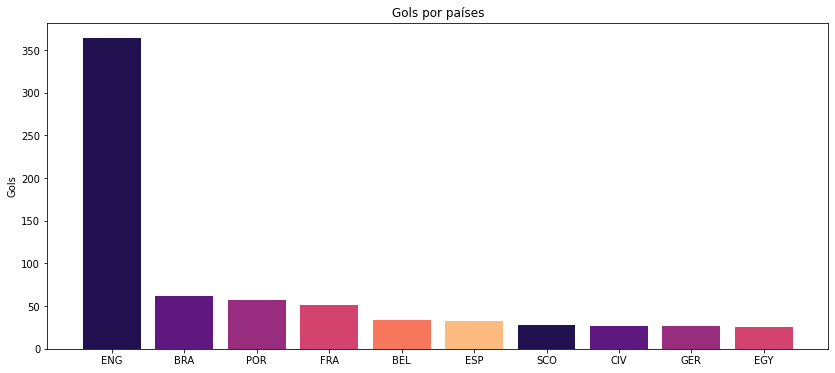

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(paises['Nationality'], paises['Goals'].nlargest(10), color=sns.color_palette('magma'))
plt.title('Gols por países')
plt.ylabel('Gols')
plt.show()

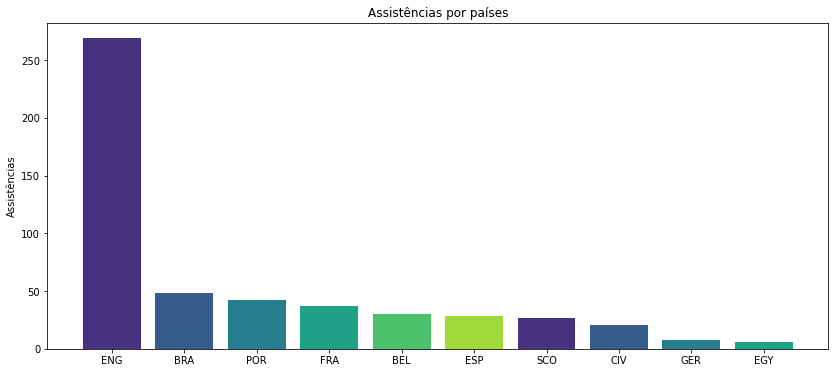

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(paises['Nationality'], paises['Assists'].nlargest(10), color=sns.color_palette('viridis'))
plt.title('Assistências por países')
plt.ylabel('Assistências')
plt.show()

In [ ]:
# Média de gols e assistências
print(epl['Goals'].mean() ,epl['Assists'].mean())

1.8533834586466165 1.287593984962406


In [ ]:
# Dez jogadores com mais gols e assistências que a média
acima_media = epl[(epl['Goals'] > epl['Goals'].mean()) & (epl['Assists'] > epl['Assists'].mean())]
acima_media[['Name', 'Club', 'Matches', 'Goals', 'Assists']].nlargest(10, columns='Goals')

,Name,Club,Matches,Goals,Assists
162,Harry Kane,Tottenham Hotspur,35,23,14
81,Mohamed Salah,Liverpool FC,37,22,5
51,Bruno Fernandes,Manchester United,37,18,12
161,Son Heung-min,Tottenham Hotspur,37,17,10
214,Patrick Bamford,Leeds United,38,17,7
110,Jamie Vardy,Leicester City,34,15,9
267,Ollie Watkins,Aston Villa,37,14,5
33,İlkay Gündoğan,Manchester City,28,13,2
191,Alexandre Lacazette,Arsenal,31,13,2
120,Kelechi Iheanacho,Leicester City,25,12,2


In [ ]:
# Dez times com maior número de gols
times = pd.DataFrame(epl.groupby('Club', as_index=False)[['Matches', 'Goals', 'Assists', 'Penalty_Goals']].sum().nlargest(10, columns='Goals'))
times

,Club,Matches,Goals,Assists,Penalty_Goals
11,Manchester City,495,82,55,5
12,Manchester United,517,70,51,10
16,Tottenham Hotspur,530,66,50,5
10,Liverpool FC,522,65,43,6
9,Leicester City,517,64,45,10
8,Leeds United,525,60,45,4
18,West Ham United,517,60,46,2
4,Chelsea,526,56,38,8
0,Arsenal,532,53,38,6
1,Aston Villa,509,52,38,5


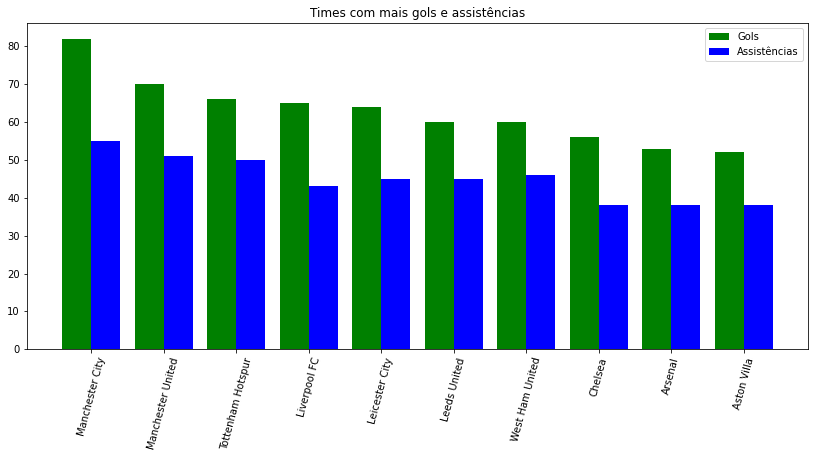

In [ ]:
# Gráfico de barras com gols e assistências
plt.figure(figsize=(14,6))
plt.bar(times['Club'], times['Goals'], width=-0.4, align='edge', color='green')
plt.bar(times['Club'], times['Assists'], width=0.4, align='edge', color='blue')
plt.xticks(rotation=75)
plt.legend(['Gols', 'Assistências'])
plt.title('Times com mais gols e assistências')
plt.show()

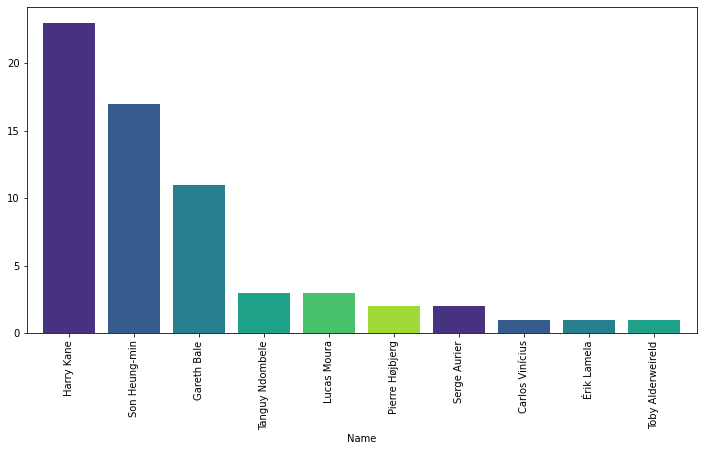

In [ ]:
# Jogadores que mais fizeram gols pelo Tottenham
gols_Tottenham = pd.DataFrame(epl[epl['Club'] == 'Tottenham Hotspur'])[['Name', 'Goals', 'Assists']].sort_values(by='Goals', ascending=False)
gols_Tottenham.index=gols_Tottenham['Name']
gols_Tottenham = gols_Tottenham.drop(columns=['Name'])
gols_Tottenham['Goals'].nlargest(10).plot(figsize=(12,6), kind='bar', width=0.8, color=sns.color_palette('viridis'))